# Variables and Justification

## Y Variable 

**annual_base_pay**

## X Variables

**total_experience_years**

The years of experience someone has can greatly impact their compensation as a result of the insight they bring through their experience so this variable is highly relevant to someone’s annual compensation.

**employer_experience_years**

Someone’s employer experience years are directly relevant to their skillset in a particular field, with employer experience years being defined as the years of experience someone has in a particular field or specific company, which can obviously have a significant impact on annual compensation.

**signing_bonus**

One's signing bonus could impact their initial compensation since the company provided a large portion up front resulting in a lower salary, so this relationship would be interesting to analyze.

**annual_bonus & stock_value_bonus**

Someone’s annual bonus and stock options can reduce their pay as a result of performance-based compensation so these variables relationship to salary will be interesting to analyze with respect to annual compensation.

**location_state/province & location_country**

These variables will allow us to analyze the impact of where someone lives/works on their salary enabling us to assess the impact of geographical factors on annual compensation.

**job_title_category**

This variable allows us to compare salaries across sectors in tech which is crucial to understanding the industry landscape.

**job_title_rank**

This variable will allow us to gauge the impact of seniority on annual compensation which is important in terms of understanding how long it could take to reach different levels of compensation in in various sectors.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

T_S = pd.read_csv(r"C:\Desktop\Rotman Commerce\Year 3\Sem 2\ECO 225\Data\Tech Salaries\salaries_clean.csv")

# sets pandas to display floats in regular notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Columns to analyze
columns_to_check = ['total_experience_years', 'employer_experience_years', 'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus']

# Convert columns to numeric
for col in columns_to_check:
    T_S[col] = pd.to_numeric(T_S[col], errors='coerce')  # Convert to numeric

# Drop rows with NaN in relevant columns
T_S = T_S.dropna(subset=columns_to_check)

# Initialize an empty DataFrame for outliers
outliers = pd.DataFrame()

# Loop through each column to calculate outliers
for col in columns_to_check:
    Q1 = T_S[col].quantile(0.25)  # 25th percentile
    Q3 = T_S[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    col_outliers = T_S[(T_S[col] < lower_bound) | (T_S[col] > upper_bound)]
    outliers = pd.concat([outliers, col_outliers])  # Add to outliers DataFrame

# Drop duplicates in case of overlap across columns
outliers = outliers.drop_duplicates()

# Create a non-outliers DataFrame
non_outliers = T_S[~T_S.index.isin(outliers.index)]

def analyze(DataFrame, columns=None):
    """
    Analyze a dataframe and output basic statistics in the describe.() method in a addition to excess kurtosis, skewness and the results of
    normality tests for both kurtosis and skewness
    """
    
    # Select specific columns to analyze if provided, otherwise use all numeric columns
    if columns is not None:
        DataFrame = DataFrame[columns]
    else:
        DataFrame = DataFrame.select_dtypes(include=[np.number])  # Select numeric columns only

    # Calculate the length of the dataset
    length = len(DataFrame)

    # Basic statistics
    stats = DataFrame.describe()

    # Skewness and excess kurtosis
    skewness = DataFrame.skew()
    kurtosis = DataFrame.kurtosis()

    # Test for normality of skewness
    Norm_Skew = skewness.apply(lambda x: 'Normal' if abs(x * np.sqrt(length / 6)) <= 1.96 else 'Not Normal')

    # Test for normality of kurtosis
    Norm_Kurt = kurtosis.apply(lambda x: 'Normal' if abs(x * np.sqrt(length / 24)) <= 1.96 else 'Not Normal')

    # Combine skewness, kurtosis, and normality into a DataFrame
    p_kurt_skew = pd.concat([skewness, kurtosis, Norm_Skew, Norm_Kurt], axis=1)
    p_kurt_skew.columns = ['Skewness', 'Excess Kurtosis', 'Norm_Skew', 'Norm_Kurt']

    # Combine with basic statistics
    p_stats = pd.concat([stats, p_kurt_skew.transpose()])

    return p_stats

analyze(non_outliers)



,index,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus
count,624.00,624.00,341.00,341.00,624.00,624.00,624.00,624.00,624.00,624.00
mean,796.27,1625.61,37.58,-57.58,5.90,1.97,77029.57,436.16,2571.25,1125.00
std,469.65,916.81,18.33,69.46,4.35,1.37,40084.83,1326.59,4972.38,3675.54
min,2.00,4.00,-41.00,-123.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,400.75,872.50,37.77,-97.00,2.50,1.00,48000.00,0.00,0.00,0.00
50%,767.00,1594.50,39.30,-91.76,5.00,2.00,75000.00,0.00,0.00,0.00
75%,1189.50,2367.75,45.49,-8.00,8.00,3.00,105000.00,0.00,2883.00,0.00
max,1654.00,3298.00,65.00,174.00,20.00,6.00,200000.00,5000.00,25000.00,20000.00
Skewness,0.10,0.05,-2.22,1.47,1.02,0.77,0.14,2.92,2.19,3.74
Excess Kurtosis,-1.17,-1.13,6.11,1.22,0.54,0.02,-0.44,6.90,4.25,13.78


In [2]:
T_S.groupby(['location_state', 'location_country']).size().reset_index(name='counts')

,location_state,location_country,counts
0,AB,CA,1
1,AL,US,1
2,AZ,US,4
3,BC,CA,4
4,CA,US,58
5,CO,US,16
6,CT,US,2
7,FL,US,4
8,GA,US,1
9,IA,US,3


In [3]:
T_S.groupby(['job_title_category', 'job_title_rank']).size().reset_index(name='counts')

,job_title_category,job_title_rank,counts
0,Applied Science,Senior,1
1,Data,1,1
2,Data,3,2
3,Data,Intern,2
4,Data,Senior,7
5,Engineering,1,1
6,Engineering,2,1
7,Engineering,4,1
8,Engineering,Junior,1
9,Engineering,Senior,19


<Axes: ylabel='Frequency'>

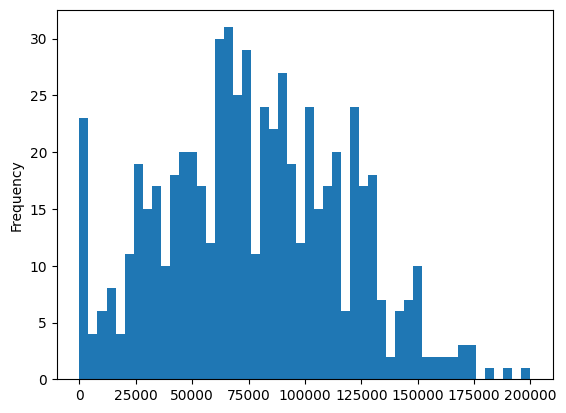

In [4]:
# Histrogram to display the annual_base_pay distribution 
non_outliers['annual_base_pay'].plot.hist(bins=50)